In [0]:
import imutils
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

## Loading an Image

In [0]:
image=cv2.imread('/content/jp.png')
h,w,d=image.shape
print('widt={} height={} depth={}'.format(w,h,d))

widt=600 height=322 depth=3


It may seem confusing that the height comes before the width, but think of it this way:

We describe matrices by # of rows x # of columns<br>
The number of rows is our height<br>
And the number of columns is our width<br>
Therefore, the dimensions of an image represented as a NumPy array are actually represented as (height, width, depth).<br>
Depth is the number of channels — in our case this is three since we’re working with 3 color channels: Blue, Green, and Red.

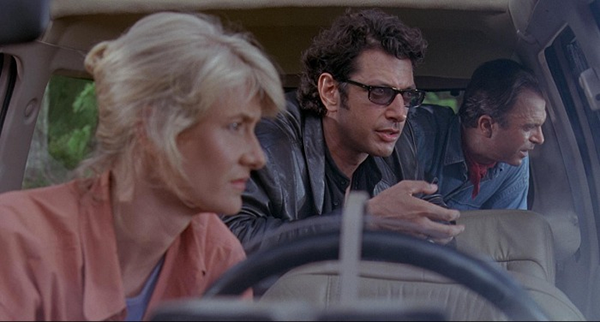

In [0]:
cv2_imshow(image)

cv2.imshow() command can cause jupyter notebook to crash so I am using alternative way to show the image using **cv2_imshow()**<br>
To access the command write: *from google.colab.patches import cv2_imshow*

In [0]:
(B,G,R)=image[100,50]
print('B={} G={} R={}'.format(B,G,R))

B=37 G=49 R=41


Notice the ordering is BGR rather than RGB. This is because when OpenCV was first being developed many years ago the standard was BGR ordering. Over the years, the standard has now become RGB but OpenCV still maintains this “legacy” BGR ordering to ensure no existing code breaks.

## Slicing and Cropping

Extracting “regions of interest” (ROIs) is an important skill for image processing. Array slicing is shown on Line 24 with the format: image [startY:endY, startX:endX] . This code grabs an roi <br>

I actually predetermined the (x, y)-coordinates using Photoshop 

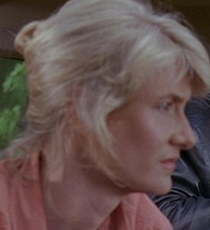

In [0]:
roi=image[20:250,70:280]
cv2_imshow(roi)

## Resizing
Let’s resize our original image to 200 x 200 pixels:

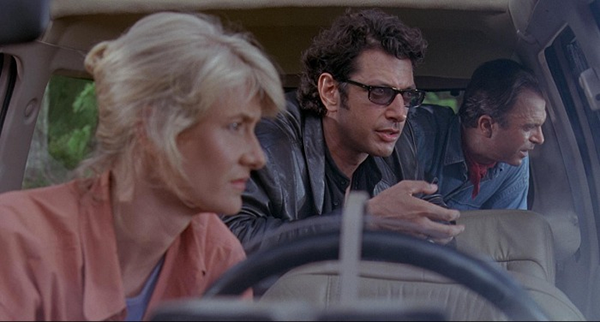

NameError: ignored

In [0]:
resized=cv2.resize(image,(200,200))
cv2_imshow(image)
cv2_imshow(resize)

The image is now distorted because we didn’t take into account the aspect ratio. Let’s calculate the aspect ratio of the original image and use it to resize an image so that it doesn’t appear squished and distorted:

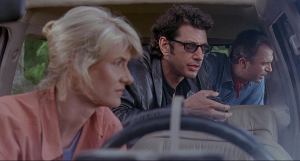

In [0]:
resize_aspect=cv2.resize(image,(300,int(300*322/600)))
cv2_imshow(resize_aspect)

Computing the aspect ratio each time we want to resize an image is a bit tedious, so there is short way wrapped in a function within **imutils** .

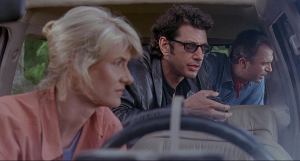

In [0]:
resize_aspect=imutils.resize(image,width=300)
cv2_imshow(resize_aspect)

## Rotating an Image
Rotating an image about the center point requires that we first calculate the center (x, y)-coordinates of the image<br>
From there we calculate a rotation matrix, M. The -45  means that we’ll rotate the image 45 degrees clockwise. Recall from your middle/high school geometry class about the unit circle and you’ll be able to remind yourself that positive angles are counterclockwise and negative angles are clockwise.

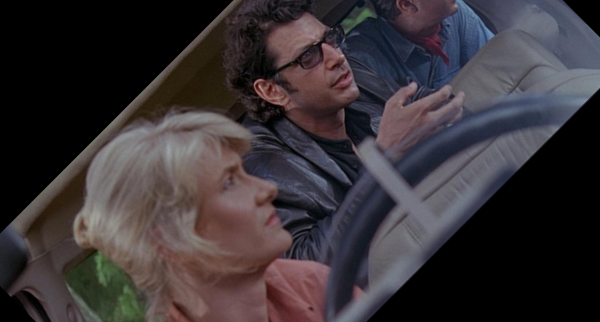

In [0]:
center=(w//2,h//2)
m=cv2.getRotationMatrix2D(center,45,1.0)
rotated=cv2.warpAffine(image,m,(w,h))
cv2_imshow(rotated)

Now let’s perform the same operation in just a single line of code using **imutils**

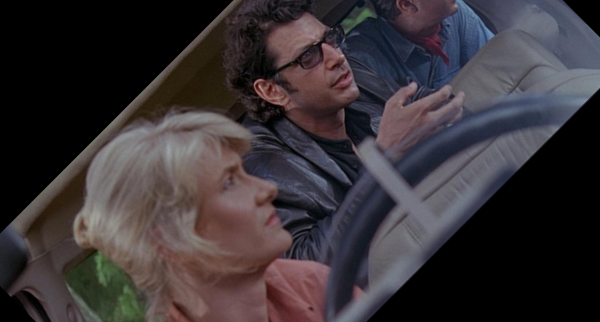

In [0]:
rotated=imutils.rotate(image,45)
cv2_imshow(rotated)

The thing is, OpenCV doesn’t care if our image is clipped and out of view after the rotation. I find this to be quite bothersome, so here’s  imutils  version which will keep the entire image in view. It is called **rotate_bound** 

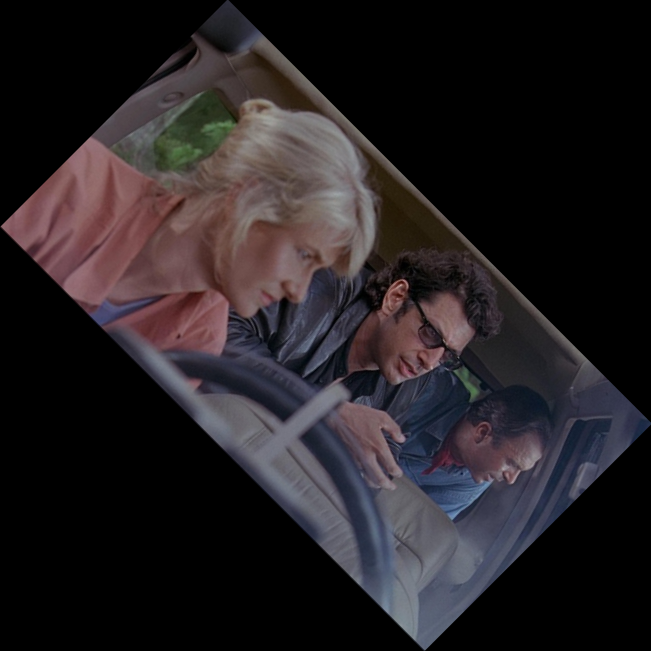

In [0]:
rotated=imutils.rotate_bound(image,45)
cv2_imshow(rotated)

## Smoothing an Image
In many image processing pipelines, we must blur an image to reduce high-frequency noise, making it easier for our algorithms to detect and understand the actual contents of the image rather than just noise that will “confuse” our algorithms. Blurring an image is very easy in OpenCV and there are a number of ways to accomplish it.

Since I am a Photoshop user as well, I like **GaussianBlur**<br>
Larger kernels would yield a more blurry image. Smaller kernels will create less blurry images. 

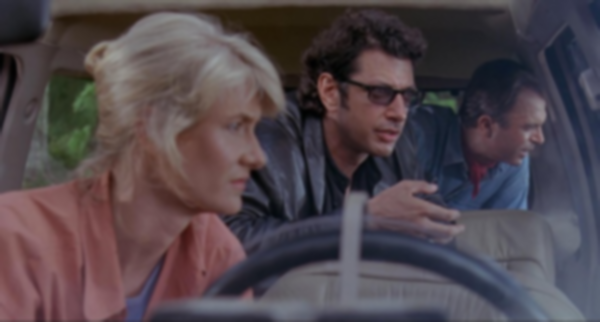

In [0]:
blurred=cv2.GaussianBlur(image,(7,7),0)
cv2_imshow(blurred)

## Drawing an Image
**NOTE** : Drawing operations on images are performed in-place. <br>
Therefore at the beginning of each code block, we make a copy of the original image storing the copy as output . We then proceed to draw on the image called output in-place so we do not destroy our original image.

I’ve supplied the following parameters to the cv2.rectangle  function on Line 76:

**img** : The destination image to draw upon. We’re drawing on output <br>
**pt1** : Our starting pixel coordinate which is the top-left. In our case, the top-left is (100, 10) <br>
**pt2** : The ending pixel — bottom-right. The bottom-right pixel is located at (270, 220) <br>
**color** : BGR tuple. To represent red, I’ve supplied (0 , 0, 255) <br>
**thickness** : Line thickness (a negative value will make a solid rectangle). I’ve supplied a thickness of 2 .

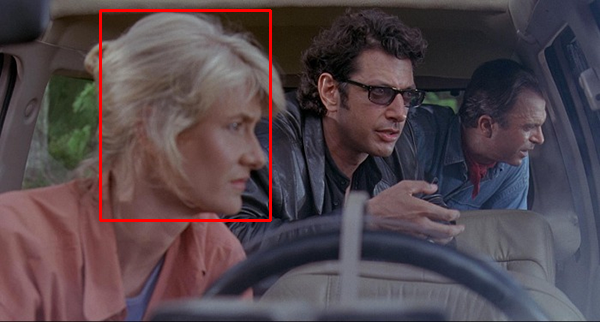

In [0]:
output=image.copy()
cv2.rectangle(output,(100,10),(270,220),(0,0,255),2)
cv2_imshow(output)

To draw a **circle**, you need to supply following parameters to cv2.circle :

**img** : The output image<br>
**center** : Our circle’s center coordinate. I supplied (300, 150)  which is right in front of Ellie’s eyes<br>
**radius** : The circle radius in pixels. I provided a value of 20  pixels<br>
**color** : Circle color. This time I went with blue as is denoted by 255 in the B and 0s in the G + R components of the BGR tuple, (255, 0, 0) <br>
**thickness** : The line thickness. Since I supplied a negative value (-1 ), the circle is solid/filled in.

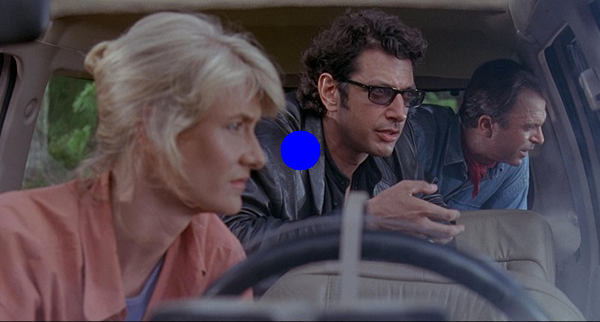

In [0]:
output=image.copy()
cv2.circle(output,(300,150),20,(255,0,0),-1)
cv2_imshow(output)

To draw a **line**: Just as in a rectangle, we supply two points, a color, and a line thickness. OpenCV’s backend does the rest.

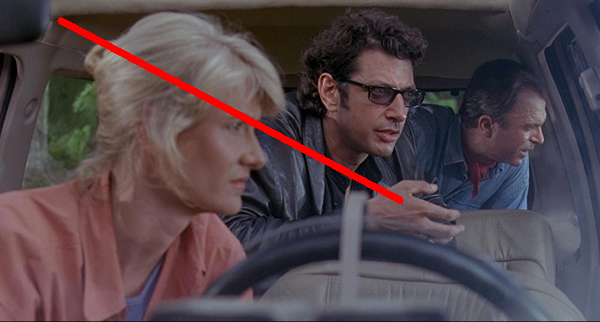

In [0]:
output=image.copy()
cv2.line(output,(60,20),(400,200),(0,0,255),5)
cv2_imshow(output)

To put a **Text**
The putText  function of OpenCV is responsible for drawing text on an image. Let’s take a look at the required parameters:

**img** : The output image<br>
**text** : The string of text we’d like to write/draw on the image<br>
**pt** : The starting point for the text<br>
**font** : I often use the cv2.FONT_HERSHEY_SIMPLEX . The available fonts are listed [here](https://docs.opencv.org/3.4.1/d0/de1/group__core.html#ga0f9314ea6e35f99bb23f29567fc16e11)<br>
**scale** : Font size multiplier<br>
**color** : Text color<br>
**thickness** : The thickness of the stroke in pixels<br>

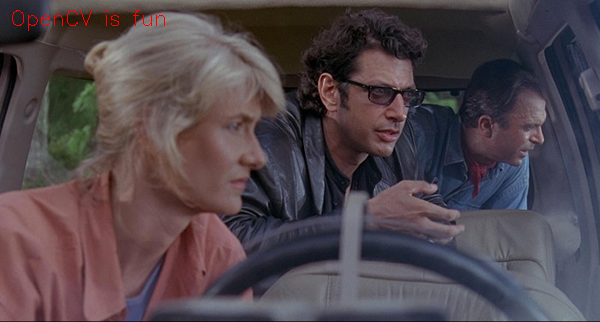

In [0]:
output=image.copy()
cv2.putText(output,'OpenCV is fun',(10,25),cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,0,255))
cv2_imshow(output)

Continue to Day 1b to explore more....[notebook](https://colab.research.google.com/drive/1UdC0o1pZG3C2Y1PgrK-4eWSYXKgY-xgV)